<a href="https://colab.research.google.com/github/DanielEXT10/AI/blob/main/Trainings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyodbc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.2/346.2 kB 4.1 MB/s eta 0:00:00


In [2]:
!sudo apt-get update
!sudo apt-get install -y curl unixodbc unixodbc-dev odbcinst odbcinst1debian2
!curl https://packages.microsoft.com/keys/microsoft.asc | sudo apt-key add -
!sudo add-apt-repository "$(curl -s https://packages.microsoft.com/config/ubuntu/20.04/prod.list)"
!sudo apt-get update
!sudo apt-get install -y msodbcsql17


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,526 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,911 kB]
Get:13 https://developer.download.nvidia.com/com

In [3]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
server = 'datasciencechallenge.database.windows.net'
database = 'DATA'
username= 'candidate'
password= 'DataForMe123'
driver = '{ODBC Driver 17 for SQL Server}'

In [5]:
conn = pyodbc.connect(f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}')

In [6]:
query = "SELECT * from training"

In [7]:
df = pd.read_sql(query, conn)

<ipython-input-7-8ca950905f18>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [8]:
conn.close()

# Exploratory Data Analysis

In [9]:
df.head()

image image class        date  \
0      training-img/flower/flower_79.jpg      flower  2016-04-05   
1          training-img/boat/boat_10.jpg        boat  2017-12-29   
2  training-img/airplane/airplane_94.jpg    airplane  2016-06-28   
3          training-img/boat/boat_79.jpg        boat  2017-05-31   
4        training-img/llama/llama_25.jpg       llama  2018-03-29   

                   bar baz                 xgt                   qgg  \
0  -13.797745783851203   1  132.24470875514425    -14.88801872201585   
1    1370.968440665586   0  -53.01039645589046  -0.24963812977973132   
2   1240.6158630608575   1   318.1031698982324    25.234515650768653   
3   1258.3685162996246   0  221.06882097920672    -5.604372923353575   
4   307.45801891084375   0  259.11085621501456      2.89688727881775   

                 lux                   wsg                  yyz  \
0  7059.592259225923   0.01876048427176777  -10.131641319644267   
1  5404.074707470747  0.014199145171670324  -0.8406724667636857   
2  6435.785062154563  0.014365620723305913   -4.984576044078693   
3  4915.487848784878   0.02196747275212649    6.189879905830826   
4  5285.831301422142  0.014829706917609714   -7.544631713772271   

                    drt                  gox                 foo  \
0   -3.3144816968633233  -19.637941490204533  24.774894872679127   
1    -57.50518571816879  -0.4770054679143539   43.99330072046682   
2  -0.22209667357081647    -9.07895666537972  2.4448795468925297   
3   -0.7327254092473499   2.3243115749197933   19.29056461490825   
4    -22.70189592112171    3.066920926551218   11.17130789926544   

                   boz fyt lgh                  hrt                 juu  \
0  0.07767576338893759   1   0  -144.07860601236203  367.97783427175216   
1    4.266039015301385   1   1  -169.23262914693413  215.09410422805132   
2   1.0354869830071756   1   1   -220.3493511149105  220.02702572915751   
3   0.2069482896028223   0   0    -246.892242645665   495.7296584727068   
4   0.5304660563106567   1   0  -199.51048746793475  234.04711920728118   

               target  
0  134340.06407984282  
1   167657.6245502007  
2  157211.30269840566  
3   -47320.6048670479  
4    -85209.683793766

In [10]:
#Avoid to modify the original source
dataset = df

In [22]:
# Number of Rows and columns
df.shape

(678, 19)

In [15]:
dataset.groupby('image class')['image'].count()

image class
airplane    69
boat        76
cake        84
cartoon     27
cat         75
dog         72
flower      91
llama       40
mountain    86
person      58
Name: image, dtype: int64

In [12]:
dataset.describe().transpose()

count unique                                top freq
image         678    678  training-img/flower/flower_79.jpg    1
image class   678     10                             flower   91
date          678    505                         2018-05-30    4
bar           678    628                  0.030331154084955    3
baz           678      2                                  0  350
xgt           678    678                 132.24470875514425    1
qgg           678    678                 -14.88801872201585    1
lux           678    665                  7131.012601260126    2
wsg           678    678                0.01876048427176777    1
yyz           678    678                -10.131641319644267    1
drt           678    678                -3.3144816968633233    1
gox           678    678                -19.637941490204533    1
foo           678    678                 24.774894872679127    1
boz           678    678                0.07767576338893759    1
fyt           678      2                                  0  358
lgh           678      2                                  0  441
hrt           678    678                -144.07860601236203    1
juu           678    678                 367.97783427175216    1
target        678    678                 134340.06407984282    1

In [13]:
# Summary of dataset and no-null count
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image        678 non-null    object
 1   image class  678 non-null    object
 2   date         678 non-null    object
 3   bar          678 non-null    object
 4   baz          678 non-null    object
 5   xgt          678 non-null    object
 6   qgg          678 non-null    object
 7   lux          678 non-null    object
 8   wsg          678 non-null    object
 9   yyz          678 non-null    object
 10  drt          678 non-null    object
 11  gox          678 non-null    object
 12  foo          678 non-null    object
 13  boz          678 non-null    object
 14  fyt          678 non-null    object
 15  lgh          678 non-null    object
 16  hrt          678 non-null    object
 17  juu          678 non-null    object
 18  target       678 non-null    object
dtypes: object(19)
memory usage: 1

In [14]:
#Convert columns to numeric type
for col in dataset.select_dtypes(include=['object']).columns:
    dataset[col] = pd.to_numeric(dataset[col], errors='ignore')

<ipython-input-14-07823f031634>:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  dataset[col] = pd.to_numeric(dataset[col], errors='ignore')


In [37]:
dataset.describe().transpose()

count          mean            std            min           25%  \
bar     678.0    272.596959     455.674351    -122.718563     -1.172115   
baz     678.0      0.483776       0.500106       0.000000      0.000000   
xgt     678.0     90.587944     199.787516    -659.009264    -41.027457   
qgg     678.0      0.275038      10.632054     -26.393565     -5.145561   
lux     678.0   5972.968223     946.157717    3577.806382   5251.671467   
wsg     678.0      0.013516       0.004958      -0.001431      0.010015   
yyz     678.0     -0.562406      10.238688     -26.589758     -6.000219   
drt     678.0  -1176.249240   11114.814451 -263127.335321   -177.561933   
gox     678.0      0.060121      10.212959     -26.977454     -5.402552   
foo     678.0     27.726691      12.733780      -5.853642     19.073640   
boz     678.0      2.933559       7.772302       0.023978      0.323719   
fyt     678.0      0.471976       0.499583       0.000000      0.000000   
lgh     678.0      0.349558       0.477182       0.000000      0.000000   
hrt     678.0   -250.798255     169.232001    -735.738392   -369.058274   
juu     678.0    218.267162     140.191122       0.473126    108.477183   
target  678.0  78097.213980  140731.435987 -242403.223513 -52162.134730   

                 50%            75%            max  
bar        29.902258     394.663978    1719.200416  
baz         0.000000       1.000000       1.000000  
xgt        88.263655     230.012526     756.848769  
qgg         0.256704       5.338567      25.452515  
lux      5913.579658    6713.397840    7627.667867  
wsg         0.013589       0.017047       0.029869  
yyz        -0.285696       4.805834      25.742596  
drt       -21.629014      -3.325435      -0.001729  
gox         0.201862       5.296834      26.936961  
foo        27.239246      36.446692      66.001361  
boz         0.951086       2.476563     103.649905  
fyt         0.000000       1.000000       1.000000  
lgh         0.000000       1.000000       1.000000  
hrt      -253.188698    -137.419007     266.571596  
juu       197.455240     306.333655     866.895515  
target  92688.358555  180006.879472  485804.881893

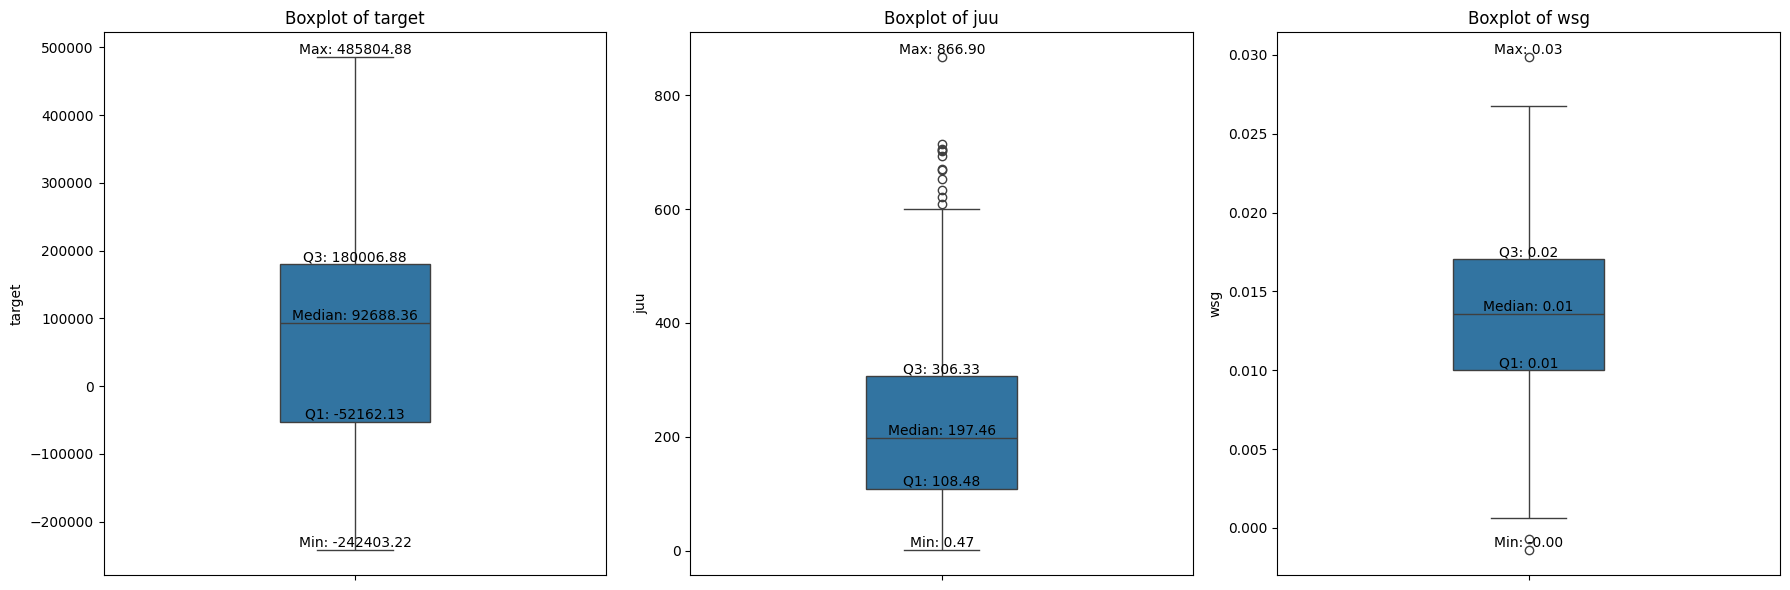

In [36]:
selected_columns = ['target', 'juu', 'wsg']  # Replace with actual column names

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(selected_columns):
    # Create a narrower boxplot (adjust width)
    sns.boxplot(y=df[col], ax=axes[i], width=0.3)  # Width reduces box size

    # Compute quantiles
    min_val = df[col].min()
    q1 = df[col].quantile(0.25)
    median = df[col].median()
    q3 = df[col].quantile(0.75)
    max_val = df[col].max()

    # Add quantile labels on the boxplot
    for val, label in zip([min_val, q1, median, q3, max_val], ['Min', 'Q1', 'Median', 'Q3', 'Max']):
        axes[i].text(0, val, f"{label}: {val:.2f}", ha='center', va='bottom', fontsize=10, color='black')

    # Set title and y-axis limit
    axes[i].set_title(f"Boxplot of {col}")


plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [18]:
numeric_df = dataset.select_dtypes(include='number')

In [19]:
correlations = numeric_df.corr()

In [20]:
correlations

bar       baz       xgt       qgg       lux       wsg       yyz  \
bar     1.000000 -0.028553  0.027032  0.031546 -0.013467  0.075022  0.057385   
baz    -0.028553  1.000000 -0.061147 -0.010969  0.034188  0.000864 -0.006077   
xgt     0.027032 -0.061147  1.000000 -0.005438 -0.051937  0.002951 -0.016945   
qgg     0.031546 -0.010969 -0.005438  1.000000 -0.007552 -0.026951  0.071375   
lux    -0.013467  0.034188 -0.051937 -0.007552  1.000000 -0.010830  0.074745   
wsg     0.075022  0.000864  0.002951 -0.026951 -0.010830  1.000000 -0.013653   
yyz     0.057385 -0.006077 -0.016945  0.071375  0.074745 -0.013653  1.000000   
drt     0.001702  0.050948 -0.010104  0.023173 -0.037707  0.007109  0.064751   
gox     0.068449 -0.022082 -0.070430  0.004620 -0.015388 -0.010421  0.087856   
foo     0.048284 -0.011031 -0.028626  0.031262  0.018396 -0.011562  0.063709   
boz    -0.032158  0.037164  0.049785 -0.019018 -0.005906  0.007430 -0.025411   
fyt     0.014731  0.012958  0.019316 -0.011392  0.102460  0.006284  0.031258   
lgh     0.045117  0.026895 -0.041508  0.005527  0.007875  0.039067  0.031272   
hrt     0.039174 -0.016132  0.069890  0.038730 -0.035841  0.034911 -0.016653   
juu     0.073569 -0.016754  0.004328 -0.023016 -0.000869  0.974137 -0.022965   
target  0.058495  0.008524  0.059559 -0.015258  0.033065 -0.000386 -0.014862   

             drt       gox       foo       boz       fyt       lgh       hrt  \
bar     0.001702  0.068449  0.048284 -0.032158  0.014731  0.045117  0.039174   
baz     0.050948 -0.022082 -0.011031  0.037164  0.012958  0.026895 -0.016132   
xgt    -0.010104 -0.070430 -0.028626  0.049785  0.019316 -0.041508  0.069890   
qgg     0.023173  0.004620  0.031262 -0.019018 -0.011392  0.005527  0.038730   
lux    -0.037707 -0.015388  0.018396 -0.005906  0.102460  0.007875 -0.035841   
wsg     0.007109 -0.010421 -0.011562  0.007430  0.006284  0.039067  0.034911   
yyz     0.064751  0.087856  0.063709 -0.025411  0.031258  0.031272 -0.016653   
drt     1.000000 -0.079854 -0.050729  0.000341 -0.043639 -0.038459 -0.011903   
gox    -0.079854  1.000000 -0.078671  0.040285  0.007829  0.065690  0.033754   
foo    -0.050729 -0.078671  1.000000  0.006327 -0.001638 -0.026886  0.013550   
boz     0.000341  0.040285  0.006327  1.000000  0.038627  0.086327  0.023467   
fyt    -0.043639  0.007829 -0.001638  0.038627  1.000000 -0.005319  0.007951   
lgh    -0.038459  0.065690 -0.026886  0.086327 -0.005319  1.000000  0.043820   
hrt    -0.011903  0.033754  0.013550  0.023467  0.007951  0.043820  1.000000   
juu     0.005409 -0.007036 -0.018235  0.010527 -0.000747  0.036274  0.016335   
target  0.001962 -0.011707 -0.011086  0.033299 -0.011562 -0.039907 -0.036169   

             juu    target  
bar     0.073569  0.058495  
baz    -0.016754  0.008524  
xgt     0.004328  0.059559  
qgg    -0.023016 -0.015258  
lux    -0.000869  0.033065  
wsg     0.974137 -0.000386  
yyz    -0.022965 -0.014862  
drt     0.005409  0.001962  
gox    -0.007036 -0.011707  
foo    -0.018235 -0.011086  
boz     0.010527  0.033299  
fyt    -0.000747 -0.011562  
lgh     0.036274 -0.039907  
hrt     0.016335 -0.036169  
juu     1.000000 -0.005196  
target -0.005196  1.000000

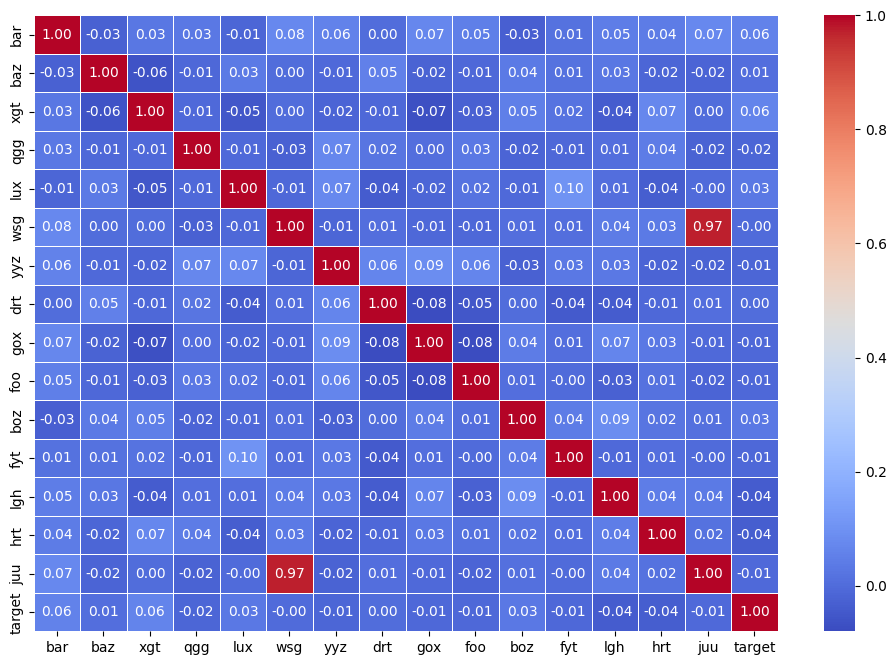

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.show()

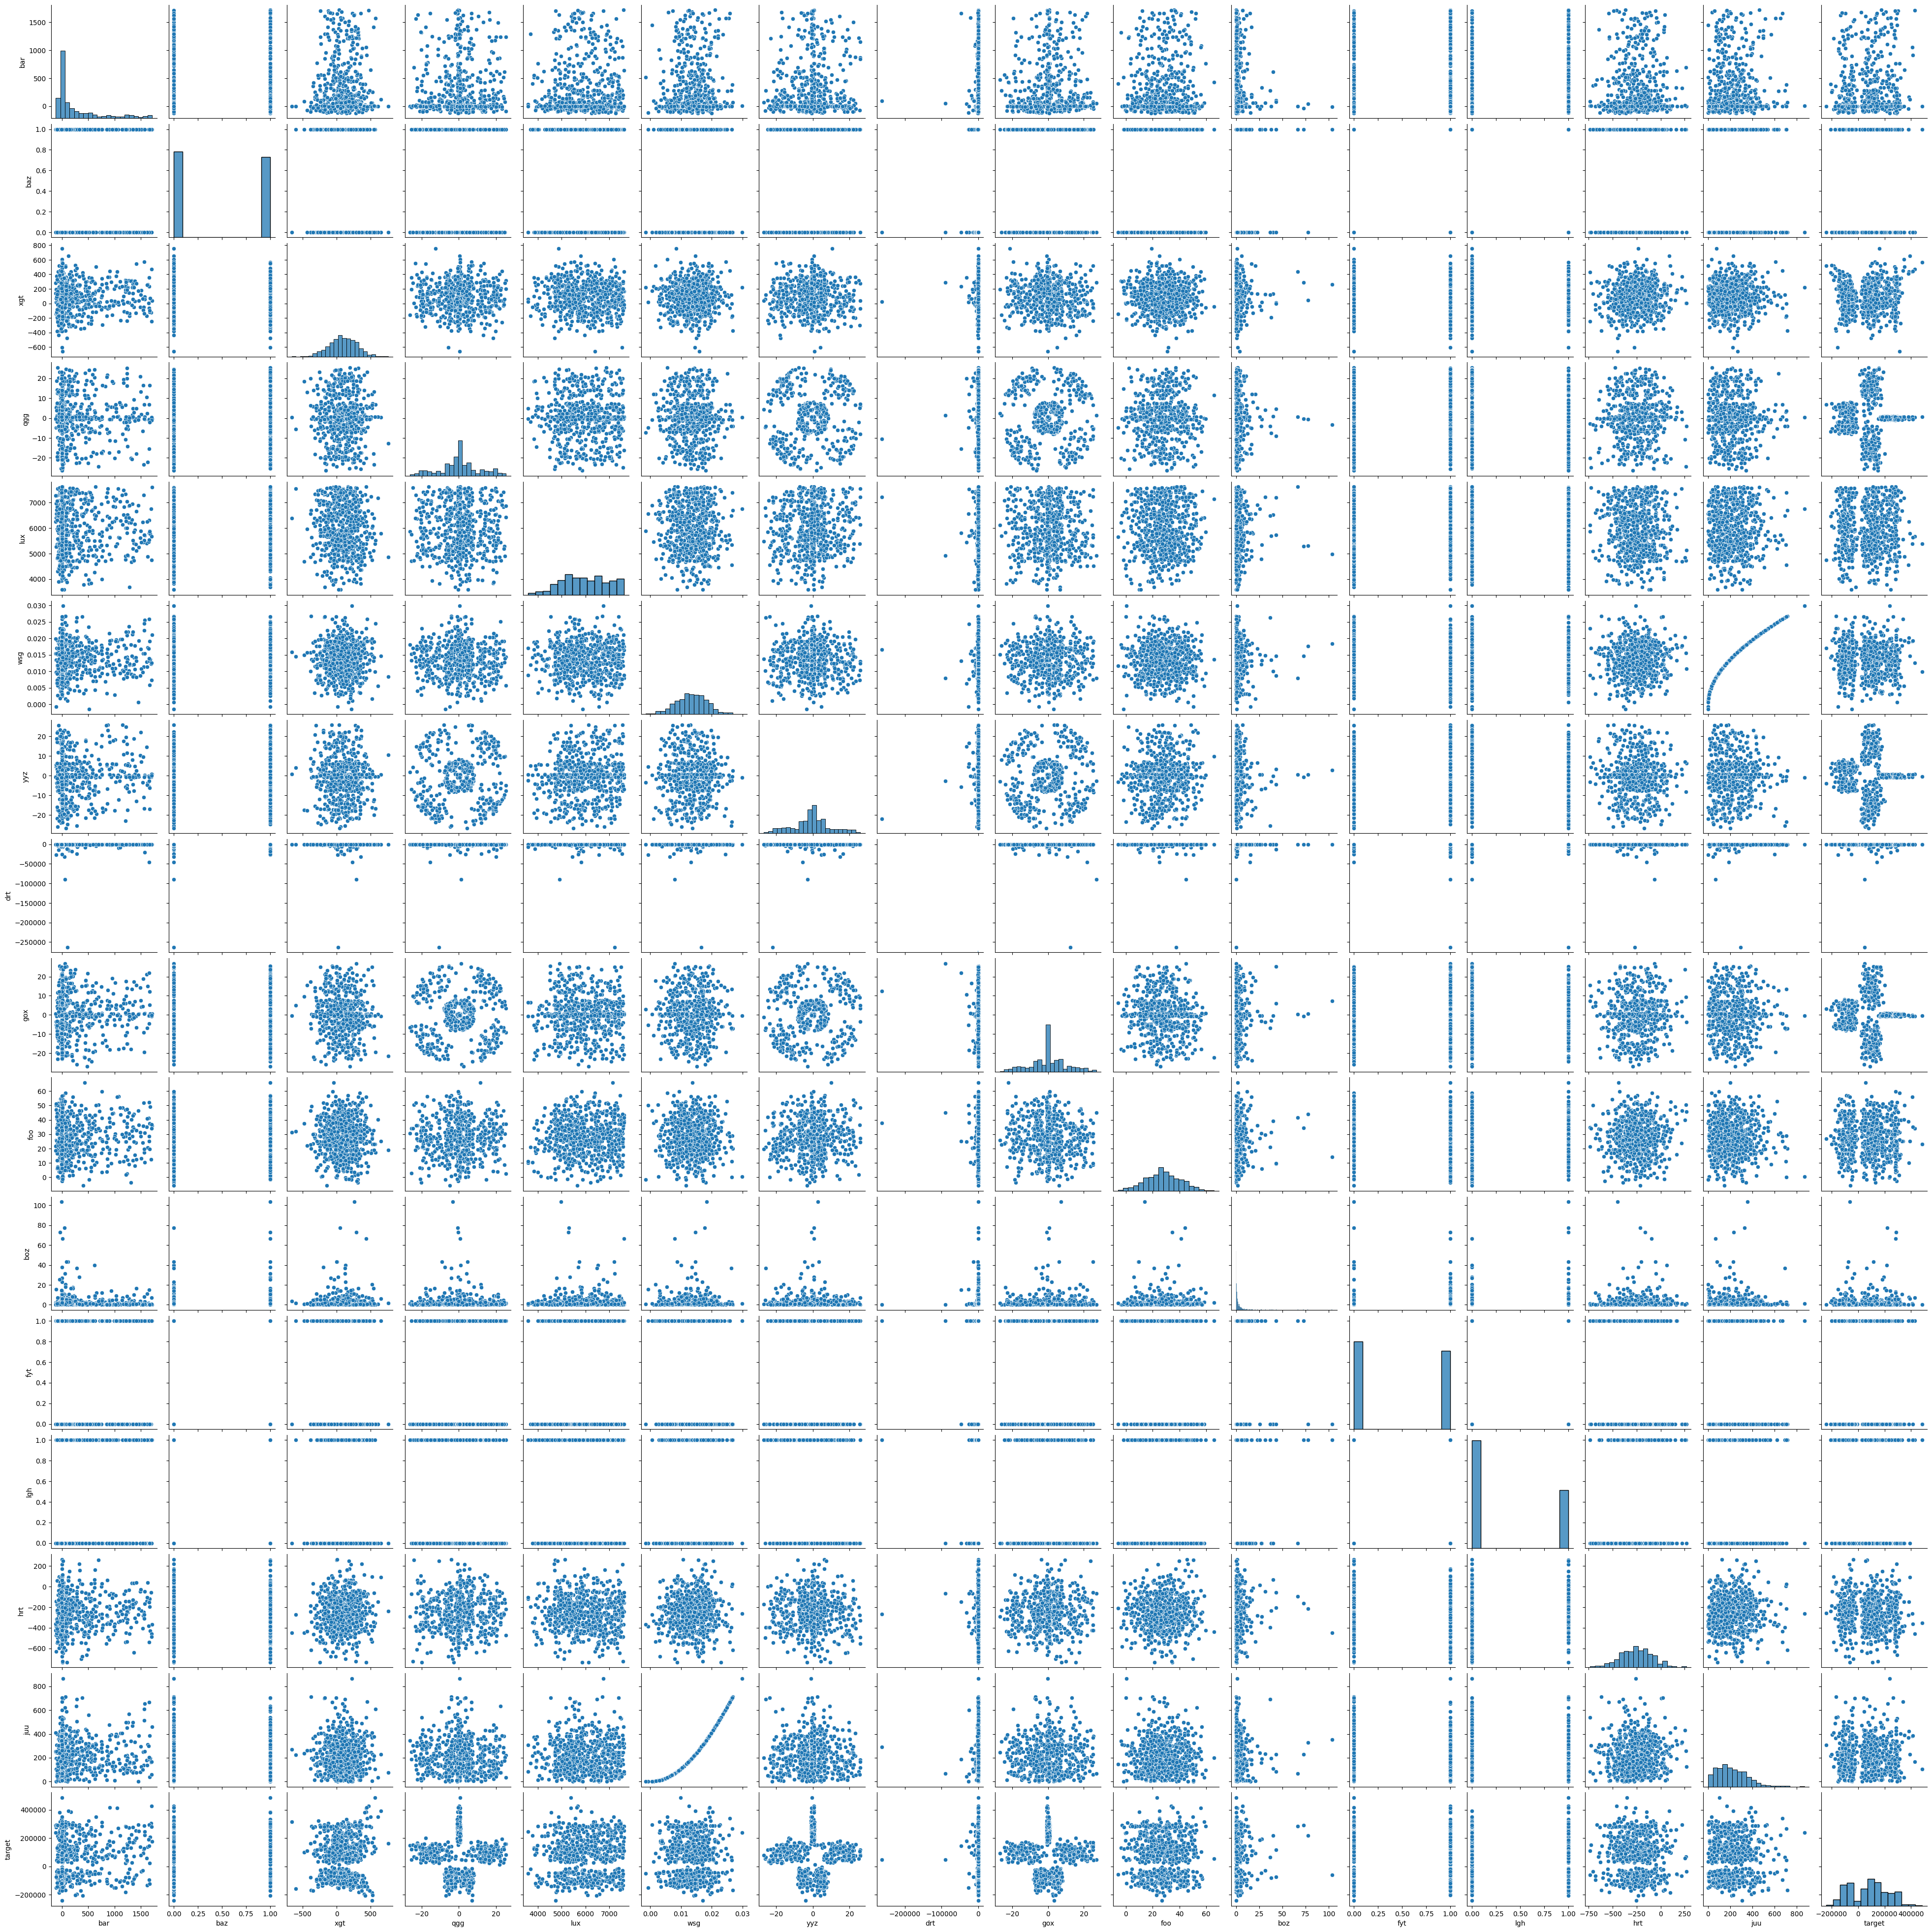

In [39]:
sns.pairplot(dataset)  # Pairplot for relationships between features
plt.show()

# Image Classification